# Анализ поведения пользователей приложения

## Содержание
- [1. Загрузка данных](#1.-Загрузка-данных)
- [2. Подготовка данных к анализу](#2.-Подготовка-данных-к-анализу)
- [3. Функции для расчета и анализа удержания и конверсии](#3.-Функции-для-расчета-и-анализа-удержания-и-конверсии)
- [4. Исследовательский анализ данных](#4.-Исследовательский-анализ-данных)
- [5. Выделение групп пользователей](#5.-Выделение-групп-пользователей)
- [6. Проверка статистических гипотез](#6.-Проверка-статистических-гипотез)
- [7. Общий вывод](#7.-Общий-вывод)

### Описание проекта

Наше приложение «Ненужные вещи» используется для продажи ненужных вещей. Наши пользователи совершают много действий в приложении, и мы уверены, что в этих данных есть инсайты, которые позволят нам стать лучшим приложением для продажи ненужных вещей и увеличить продажи пользователей через приложение.

**Цели и задачи исследования**: 

**1. Общий анализ поведения пользователей**

Проанализируем следующие показатели для определения общего поведения пользователей: 
1. retention rate,
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.


**2. Выделение групп пользователей на основе их поведения в приложении. Определение целевой и смежных групп для увеличения продаж.** 

Выделим группы пользователей и проанализируем следующие показатели для каждой из групп:
1. retention rate,
2. конверсия в целевое действие — просмотр контактов.


**3. Проверка статистических гипотез поведения пользователей:**

Проверим следующие статистические гипотезы: 

3.1. Конверсия пользователей, которые загрузили приложение через Яндекс, отличается от конверсии пользователей, которые загрузили приложение через Google. 

3.2. В приложении есть функция добавления объявлений в избранное. Проверим гипотезу о том, что у пользователей, которые добавляют объявление в избранное, выше конверсия в целевое действие (просмотр контактов), чем у остальных пользователей.

**Работа пройдет в несколько этапов:**

1. Загрузим данных и подготовим их к анализу.
2. Создадим нужные для анализа функции.
3. Проанализируем данные.
4. Сегментируем пользователей на группы и посмотрим для каждой из них удержание и конверсию.
4. Проверим статистические гипотезы.
5. На основе полученных данных сделаем выводы и дадим рекомендации по улучшению приложения.

## 1. Загрузка данных
[наверх](#Содержание)

**1.1 Загрузим нужные библиотеки и функции:**

In [1]:
# загрузим нужные библиотеки и функции
import os
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import array
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import statistics
from scipy import stats as st
from scipy.stats import mode
import math as mth
from cmath import sqrt

**1.2. Прочитаем файлы из папки, в которой они хранятся, и сохраним их в переменные:**

In [2]:
sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
ds = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

**1.3. Выведем на экран общую информацию о таблицах и первые 5 строк.**

In [3]:
display(sources.head())
display(sources.info())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

In [4]:
display(ds.head())
display(ds.info())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

**1.4. Проверим наличие пропусков в таблицах:**

In [5]:
# проверим количество пропусков в столбцах таблицы
display(sources.isna().sum())

userId    0
source    0
dtype: int64

In [6]:
# проверим количество пропусков в столбцах таблицы
display(ds.isna().sum())

event.time    0
event.name    0
user.id       0
dtype: int64

В таблицах нет пропущенных данных. 

**1.5. Посмотрим, какие данные представлены в столбцах таблиц, сделаем описание данных. Посмотрим формат данных ячеек и решим, нужно ли его изменить:**

Пропущенных данных в таблице нет. В таблице **`sources`** 2 столбца, оба текстовые и имеют формат `object`. Формат ячеек изменять не нужно.

В таблице **`ds`** 3 столбца, все имеют формат `object`. Нам необходимо будет изменить формат столбца `event.time`, который содержит дату и время события, на формат `datetime`.

**Описание данных**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_sources.csv** **(таблица sources)** содержит колонки:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Датасет **mobile_dataset.csv** **(таблица ds)** содержит колонки:
- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Расшифровки событий из столбца `event.name`:
- `advert_open` — открытие карточки объявления
- `photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

Теперь приведем данные в нужный формат и подготовим к анализу.

## 2. Подготовка данных к анализу
[наверх](#Содержание)

**2.1. Заменим скрытые дубликаты в столбце `event.name`:**

Посмотрим частоту событий из столбца `event.name`:

In [7]:
# сгруппируем датасет ds по столбцу 'event.name' и посчитаем кол-во событий каждого типа

ds.groupby('event.name')['event.name'].count().sort_values(ascending=False)

event.name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event.name, dtype: int64

Как мы видим, в столбце есть скрытые дубликаты одних и тех же событий (просмотр контактов). Приведем название в ячейке к единому виду:

In [8]:
# заменим скрытые дубликаты в ячейках столбца 'event.name'

ds['event.name'] = ds['event.name'].replace('show_contacts', 'contacts_show')

Кроме того, в списке событий выделяется 7 видов поиска. Для анализа данных нам не нужна такая детализация, объединим их под одним названием:

In [9]:
# создадим список с названиями, которые необходимо заменить
# заменим названия из списка на нужное название 

search_names = ['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']

for name in search_names:
    ds['event.name'] = ds['event.name'].replace(name, 'search')

Проверим результат:

In [10]:
ds.groupby('event.name')['event.name'].count().sort_values(ascending=False)

event.name
tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event.name, dtype: int64

Количество типов событий сократилось.

**2.2. Проверим наличие дубликатов в таблице. Удалим их, если они есть.**

In [11]:
# проверим количество дубликатов
print(f'Количество дубликатов в таблице sources:', sources.duplicated().sum()) 
print(f'Количество дубликатов в таблице ds:', ds.duplicated().sum()) 

Количество дубликатов в таблице sources: 0
Количество дубликатов в таблице ds: 0


В обеих таблицах отсутсвуют дубликаты строк. 

**2.2. Заменим названия столбцов в соответствие с принятыми правилами.**

In [12]:
# назначим новые названия столбцов
sources.columns = ['user_id', 'source']

# заменим точки в названиях на "_"
ds = ds.rename(columns=lambda col: col.replace(".", "_"))

In [13]:
# проверим результат, выведем первые 5 строк таблицы
sources.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [14]:
# проверим результат, выведем первые 5 строк таблицы
ds.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Названия столбцов приведены к нужному виду.

**2.3. Проверим, что в таблице с данными о пользователях представлены только уникальные пользователи.**

Проверим, что для каждого пользователя указан только один источник перехода:

In [15]:
# сгруппируем таблицу sources по 'user_id' и посчитаем сумму источников перехода, выведем максимальное значение 
sources.groupby('user_id')['source'].count().max()

1

Убедилим, что в таблице `sources` присутствуют уникальные пользователи с одним источником перехода в приложение.

**2.4. Изменим формат данных в ячейках.**

In [16]:
# заменим формат в ячейках с датой и временем на datetime
ds['event_time'] = pd.to_datetime(ds['event_time'])

**2.5. Добавим новые столбцы с вычисляемыми данными (длина сессии, количество событий в сессии, признак того, что пользователь совершил целевое действие (посмотрел контакты в карточке объявления)).**

Создадим сессии пользователей. Для расчета будем считать, что сессия пользователя прерывается, если он не совершал новое действие в приложении в течение 5 минут от предыдущего действия (поскольку можно предположить, что пользователь может быть занят чтением текста объявления в течение определенного времени и не совершать других действий):

In [17]:
# отсортируем данные в таблице ds по столбцам 'user_id' и 'event_time' 
# сортировака необходима для правильной работы функции .diff()
ds = ds.sort_values(['user_id', 'event_time'])

# вычислим разницу между событиями с помощью функции .diff()
diff_timestamp = ds.groupby('user_id')['event_time'].diff() 

# создадим условие для простановки нового номера сессии 
new_session = (diff_timestamp.isnull()) | (diff_timestamp > pd.Timedelta('5Min'))

# создадим session_id для каждого пользователя
ds['session_id'] = ds.loc[new_session, ['user_id', 'event_time']].groupby('user_id').rank(method='first').astype(int)

# для последних событий в сессии заменим NaN на значение предыдущей ячейки методом ffill
ds['session_id'] = ds['session_id'].fillna(method='ffill').astype(int)

Проверим результат:

In [18]:
ds.head(15)

,event_time,event_name,user_id,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
831,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
832,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
836,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
839,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2


Действия пользователей были выделены в отдельные сессии по нашим условиям.

Создадим сводную таблицу сессий пользователей, в которой будет указано количество событий в каждой сессии, время начала и окончания сессии:

In [19]:
# сгруппируем датасет ds по столбцам 'user_id' и 'session_id'
# посчитаем количество событий в каждой сессии, время начала и окончания сессии
# переименуем столбцы и удалим индексы

sessions_per_user = (
                ds.groupby(['user_id', 'session_id'])
                .agg(
                    {
                        'session_id': 'count', 
                        'event_time': ['min', 'max']
                                     
                    }
                )
                .rename(columns={'count': 'events_count',
                                'min': 'session_start',
                                'max': 'session_end'})
                .reset_index()
)

sessions_per_user.columns = [tup[1] if tup[1] else tup[0] for tup in sessions_per_user.columns]

Добавим в таблицу столбец в длительностью сессии:

In [20]:
# вычтем время окончания сессии из времени начала, разницу укажем в минутах
sessions_per_user['session_time'] = (
    sessions_per_user['session_end'] - sessions_per_user['session_start']
        ).astype("timedelta64[m]")

Проверим результат:

In [21]:
sessions_per_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16366 entries, 0 to 16365
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        16366 non-null  object        
 1   session_id     16366 non-null  int64         
 2   events_count   16366 non-null  int64         
 3   session_start  16366 non-null  datetime64[ns]
 4   session_end    16366 non-null  datetime64[ns]
 5   session_time   16366 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 767.3+ KB


У нас получилось 16366 отдельных сессий пользователей.

In [22]:
# отсортируем таблицу по длительности сессий
sessions_per_user.sort_values(by=['session_time'], ascending=False)

,user_id,session_id,events_count,session_start,session_end,session_time
14851,e549f8ef-653b-4c5c-a6bd-8970e6bd860b,6,86,2019-10-22 20:43:50.511077,2019-10-22 22:42:46.880725,118.0
12194,c140f88a-c544-4ce6-a6bd-578a1a0d1b18,2,58,2019-10-12 19:29:52.108144,2019-10-12 21:09:53.100759,100.0
4630,494f3ee2-cf2b-4cc0-893a-1d1f018b63ab,1,43,2019-11-01 19:38:01.804264,2019-11-01 21:13:28.278738,95.0
8186,84557d6b-7887-4baf-9281-97c2e0f76e98,1,75,2019-10-12 15:54:23.208545,2019-10-12 17:22:19.518381,87.0
6698,6d0e0712-85b4-43de-b8d2-4048540a4e9d,4,43,2019-10-28 21:14:06.111769,2019-10-28 22:33:50.221626,79.0
...,...,...,...,...,...,...
10105,a1587fa9-552f-4d5a-9dba-52e7f4e53996,1,1,2019-10-20 09:05:20.568670,2019-10-20 09:05:20.568670,0.0
10104,a15407fd-36b5-4337-9f3e-5379eebece0c,4,2,2019-10-26 21:25:29.972371,2019-10-26 21:26:13.505200,0.0
10103,a15407fd-36b5-4337-9f3e-5379eebece0c,3,1,2019-10-26 21:19:09.989521,2019-10-26 21:19:09.989521,0.0
10100,a132c9a9-82ef-4b31-9648-87f0c58ef17c,2,1,2019-10-26 17:01:28.599103,2019-10-26 17:01:28.599103,0.0


Самая длинная сессия пользователя длилась 118 минут (почти 2 часа) и состояла из 86 событий, самые короткие - меньше минуты (обычно только 1 событие).

Добавим к таблице с сессиями источник перехода в приложение:

In [23]:
# присоединим к таблице sessions_per_user столбец 'source' из таблицы sources

sessions_per_user = sessions_per_user.merge(
    sources[['user_id', 'source']], 
    on='user_id', 
    how='left'
)

Проверим результат:

In [24]:
sessions_per_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16366 entries, 0 to 16365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        16366 non-null  object        
 1   session_id     16366 non-null  int64         
 2   events_count   16366 non-null  int64         
 3   session_start  16366 non-null  datetime64[ns]
 4   session_end    16366 non-null  datetime64[ns]
 5   session_time   16366 non-null  float64       
 6   source         16366 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 1022.9+ KB


Дополним таблицу **`ds`** столбцами с данными о длительности сессии, количестве событий и источнике перехода в приложение:

In [25]:
# присоединим к таблице ds столбцы 'session_time', 'events_count', 'source' из таблицы sessions_per_user
ds = ds[['user_id', 'event_time','event_name', 'session_id']].merge(
    sessions_per_user[['user_id', 'session_id', 'session_time', 'events_count', 'source']], 
    left_on=['user_id', 'session_id'], 
    right_on=['user_id', 'session_id'],
    how='left'
)

Проверим результат:

In [26]:
ds.head()

,user_id,event_time,event_name,session_id,session_time,events_count,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,1,9.0,9,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,1,9.0,9,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,1,9.0,9,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,1,9.0,9,other
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,1,9.0,9,other


In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       74197 non-null  object        
 1   event_time    74197 non-null  datetime64[ns]
 2   event_name    74197 non-null  object        
 3   session_id    74197 non-null  int64         
 4   session_time  74197 non-null  float64       
 5   events_count  74197 non-null  int64         
 6   source        74197 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 4.5+ MB


Таблица **`ds`** дополнена нужными столбцами. Создадим в **`ds`** новый столбец с информацией о том, совершил ли пользователь целевое действие - просмотр контактов:

In [28]:
# создадим столбец 'contacts' 
# впишем туда результат проверки наличия 'user_id' с списке пользователей, которые совершили целевое действие

ds['contacts'] = ds['user_id'].isin(ds[ds['event_name'] == 'contacts_show']['user_id'].unique())

Проверим результат:

In [29]:
ds.info()
ds.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       74197 non-null  object        
 1   event_time    74197 non-null  datetime64[ns]
 2   event_name    74197 non-null  object        
 3   session_id    74197 non-null  int64         
 4   session_time  74197 non-null  float64       
 5   events_count  74197 non-null  int64         
 6   source        74197 non-null  object        
 7   contacts      74197 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 4.6+ MB


,user_id,event_time,event_name,session_id,session_time,events_count,source,contacts
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,1,9.0,9,other,False
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,1,9.0,9,other,False
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,1,9.0,9,other,False
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,1,9.0,9,other,False
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,1,9.0,9,other,False


Столбец добавлен. 

Дополним таблицу **`sessions_per_user`** с данными о сессиях пользователей столбцом с информацией о совершении целевого действия. Для этого создадим отдельную таблицу с перечнем пользователей, которые совершили целевое действие:

In [30]:
# выделим столбцы 'user_id', 'contacts' в отдельную таблицу, удалим дубликаты
contacts = ds[['user_id', 'contacts']]
contacts = contacts.drop_duplicates().reset_index(drop=True)

И далее объединим таблицу **`sessions_per_user`** с таблицей **`contacts`**: 

In [31]:
#объединим данные таблиц sessions_per_user и contacts

sessions_per_user = sessions_per_user.merge(
    contacts, 
    on='user_id', 
    how='left'
)

Проверим результат:

In [32]:
sessions_per_user.info()
sessions_per_user.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16366 entries, 0 to 16365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        16366 non-null  object        
 1   session_id     16366 non-null  int64         
 2   events_count   16366 non-null  int64         
 3   session_start  16366 non-null  datetime64[ns]
 4   session_end    16366 non-null  datetime64[ns]
 5   session_time   16366 non-null  float64       
 6   source         16366 non-null  object        
 7   contacts       16366 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 1.0+ MB


,user_id,session_id,events_count,session_start,session_end,session_time,source,contacts
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,9,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.0,other,False
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2,2019-10-09 18:33:55.577963,2019-10-09 18:35:28.260975,1.0,other,False
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2,2019-10-09 18:40:28.738785,2019-10-09 18:42:22.963948,1.0,other,False
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,14,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14.0,other,False
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5,8,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,12.0,other,False


### **Вывод** 

Мы подготовили данные к анализу:
- проверили и заменили дубликаты
- привели к нужному виду названия столбцов
- перевели ячейки в нужный формат
- создали таблицу с сессиями пользователей
- вычислили время сессии пользователей и количество событий за одну сессию
- дополнили таблицы с событиями и сессиями пользователей столбцами с длиной сессии, количеством событий в сессии и  признаком того, что пользователь совершил целевое действие (посмотрел контакты в карточке объявления).

Прежде, чем приступить непосредственно к анализу данных, необходимо задать нужные функции. 

## 3. Функции для расчета и анализа удержания и конверсии
[наверх](#Содержание)

Зададим функции для расчета и визуализации необходимых для анализа показателей:
- `get_profiles()` - функция для создания пользовательских профилей
- `get_retention()` - функция для расчёта удержания 
- `get_conversion()` - функция для расчёта конверсии
- `plot_retention()` - функция для визуализации удержания
- `plot_conversion()` - функция для визуализации конверсии

In [33]:
# функция для создания пользовательских профилей

def get_profiles(sessions):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'source': 'first'
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
      
    return profiles

In [34]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['contacts'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date') 

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start', 'contacts']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
   
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [35]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первого совершения целевого действия (просмотр контактов) для каждого пользователя
    first_purchases = (
        purchases.query('event_name == "contacts_show"').sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавляем данные о целевом действии (просмотр контактов) в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждого целевого действия (просмотр контактов)
    result_raw['lifetime'] = (
        pd.to_datetime(result_raw['event_time']) - pd.to_datetime(result_raw['first_ts'])
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [36]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [37]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только contacts,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'contacts'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей (которые просмотрели контакты)
    ax1 = plt.subplot(2, 2, 1)
    retention.query('contacts == True').droplevel('contacts').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание пользователей, которые просмотрели контакты')

    # во второй ячейке строим кривые удержания неплатящих (которые не просмотрели контакты)
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('contacts == False').droplevel('contacts').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание пользователей, которые не просмотрели контакты')

    # в третьей ячейке — динамика удержания платящих (которые просмотрели контакты)
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'contacts']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('contacts == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей, которые просмотрели контакты, на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('contacts == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей, которые не просмотрели контакты, на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [38]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Мы задали нужные функции, теперь можем приступать к анализу данных.

## 4. Исследовательский анализ данных
[наверх](#Содержание)


**4.1 Проверим, сколько всего событий в логе. Посмотрим, сколько в логе событий каждого типа.**

In [39]:
# сгруппируем датасет ds по столбцу 'event.name' и посчитаем кол-во событий каждого типа
ds.groupby('event_name')['event_name'].count().sort_values(ascending=False)

event_name
tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

Как мы видим, больше всего событий `tips_show` — пользователь увидел рекомендованные объявления (40 тыс.), и `photos_show` — просмотр фотографий в объявлении (10 тыс.). 

В нашем приложении нет обязательного набора шагов, которые необходимо предпринять пользователю для просмотра контактов в карточке объявления, поэтому мы не можем построит воронку событий до целевого действия `contacts_show` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления.

**4.2. Проверим, сколько всего уникальных пользователей в логе.**

In [40]:
# посчитаем количество уникальных 'user_id' в таблице ds
ds['user_id'].nunique()

4293

Таблица событий содержит информацию о действиях 4293 пользователей.

**4.3. Посмотрим, за какой период представлены данные (дату и время первого и последнего события), построим гистограмму с количеством событий по дням/часам.**

Проверим, за какой период представленные данные:

In [41]:
# найдем минимальное и максимальное значение столбца 'event_time' таблицы ds
print(ds['event_time'].min())
print(ds['event_time'].max())

2019-10-07 00:00:00.431357
2019-11-03 23:58:12.532487


**Построим гистограмму по дате и времени, чтобы проверить, как распределяются данные за период наблюдения:** 

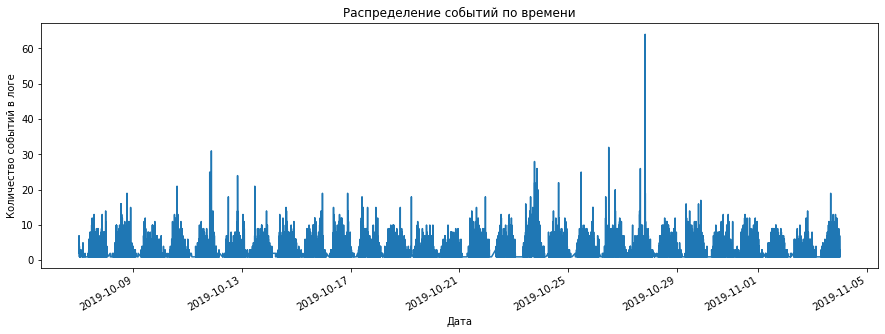

In [42]:
#добавим столбец с округленным до минуты временем совершения события
ds['event_minute'] = ds['event_time'].astype('datetime64[m]') 

#построим гистограмму
plt.figure(figsize=(15, 5)) 
ds.groupby('event_minute')['event_name'].count().plot(x='event_minute', y='event_name')
plt.xlabel('Дата')
plt.ylabel('Количество событий в логе')
plt.title('Распределение событий по времени')
plt.show()

**Вывод:** У нас есть данные о действиях 4293 пользователей за период с 7 октября по 3 ноября 2019 года. Данные представлены равномерно за все время (с учетом меньшей активности пользователей в ночное время), поэтому нам не нужно удалять из датасета данные за какой-либо период. Можно заметить аномальную активность пользователей 27 октября 2019 г.

**4.4. Проверим количество пользователей в каждой из групп по источникам перехода в приложение.**

In [43]:
#сгруппируем данные по источнику перехода и посчитаем количество пользователей для каждой группы 
sources.groupby('source')['source'].count().sort_values(ascending=False)

source
yandex    1934
other     1230
google    1129
Name: source, dtype: int64

**Вывод:** Пользователи распределены более-менее равномерно. Больше всего пользователей пришло из источника Яндекс (1934 чел.), а из источника Google - 1129 чел. Из остальных источников пришло суммарно 1230 чел. 

**4.5. Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.**

In [44]:
#создание профилей пользователей с помощью функции get_profiles
profiles = get_profiles(sessions_per_user)
display(profiles.head(5)) 

,user_id,first_ts,source,dt,month
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07,2019-10-01
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19,2019-10-01
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,yandex,2019-11-01,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,google,2019-10-18,2019-10-01
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,yandex,2019-10-25,2019-10-01


Мы создали таблицу с профилями пользователей, где для каждого пользователя указана информация о дате и времени его первой сессии, источнике перехода в приложение, а также дне и месяце первой сессии.

У нас есть данные за период с 7 октября по 3 ноября 2019 года. 

Значит моментом анализа мы можем установить дату 3 ноября 2019 года. В качестве горизонта анализа укажем 7 дней. Это позволит нам посмотреть, как пользователи окупаются за неделю с момента начала использования приложения.  

Минимальной датой привлечения пользователей в этом случае будет 7 октября 2019 года, а максимальной датой - 28 октября 2019 года.

In [45]:
#зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 3).date()  # момент анализа
horizon_days = 7  # горизонт анализа 

**4.6. Общий анализ поведения пользователей** 

Исследуем общее поведение пользователей. Для этого проанализируем следующие показатели: 

- Удержание (Retention rate),
- Конверсию в целевое действие - просмотр контактов,
- Среднее время сессии,
- Количество событий на сессию.

**4.6.1. Анализ удержания (Retention rate)**

Применим функции, которые задали ранее и посмотрим удержание пользователей:

In [46]:
# получим данные об удержании пользователей с помощью функции get_retention
dimensions = []

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions_per_user, observation_date, horizon_days, dimensions=dimensions
)

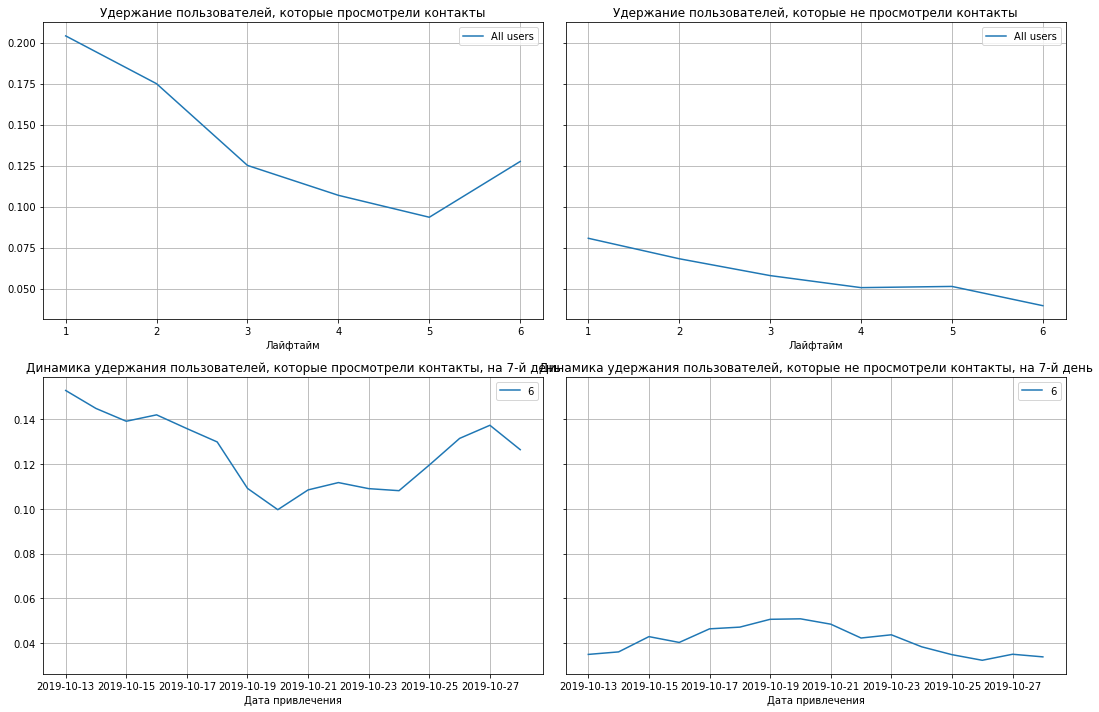

In [47]:
# визуализируем данные с помощью функции plot_retention

plot_retention(retention_grouped, retention_history, horizon_days) 

Построим тепловые карты удержания пользователей по когортам. Разобьем пользователей на тех, кто совершил целевое действие (просмотр контактов) и не совершил целевое действие:

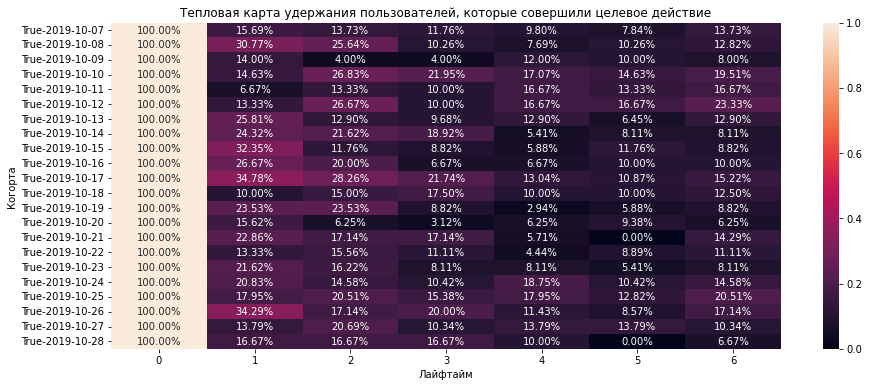

In [48]:
# построим тепловую карту удержания для пользователей, которые совершили целевое действие 

plt.figure(figsize=(15, 6))
sns.heatmap(
    retention_history.query('contacts == True').drop(columns=['cohort_size']),
    annot=True,
    fmt='.2%',
)
plt.title('Тепловая карта удержания пользователей, которые совершили целевое действие')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
plt.show()

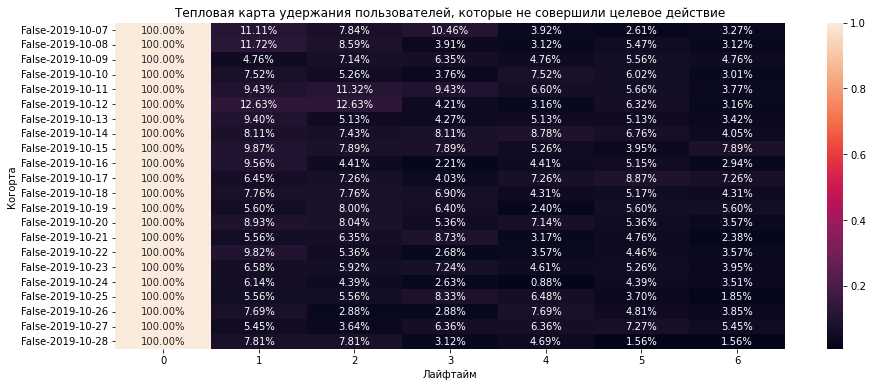

In [49]:
# построим тепловую карту удержания для пользователей, которые не совершили целевое действие 

plt.figure(figsize=(15, 6))
sns.heatmap(
    retention_history.query('contacts == False').drop(columns=['cohort_size']),
    annot=True,
    fmt='.2%',
)
plt.title('Тепловая карта удержания пользователей, которые не совершили целевое действие')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
plt.show()

**Вывод:** Как видно из графиков, удержание пользователей, которые совершили целевое действие, выше, чем пользователей, которые не совершили целевое действие. Закономерно, удержание падает в течение недели: для платящих пользователей (тех, кто соврешил целевое действие) - с на 2 день 20% до 12,5% на 7 день, для неплатящих - с 7,5% до 5%.

Для когортного анализа видно, что наибольшее удержание на 7 день демострируют платящие пользователи, которые были привлечены 12 октября 2019 г. (23,3%) и 25 октября 2019 г. (20,5%). 
Удержание неплатящих пользователей стабильно ниже для всех когорт.

**4.6.2. Анализ конверсии (Conversion rate)**

Применим функции, которые задали ранее и посмотрим конверсию пользователей:

In [50]:
# получим данные о конверсии с помощью функции get_conversion
dimensions = []

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, ds, observation_date, horizon_days, dimensions=dimensions
)

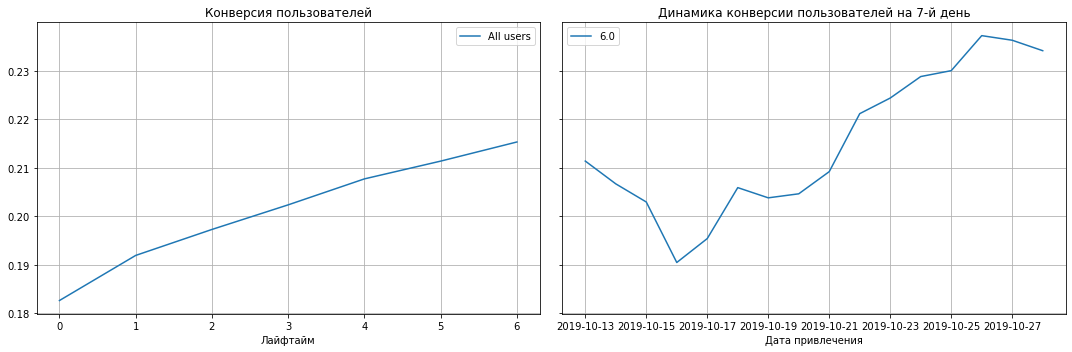

In [51]:
# визуализируем данные с помощью функции plot_conversion

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

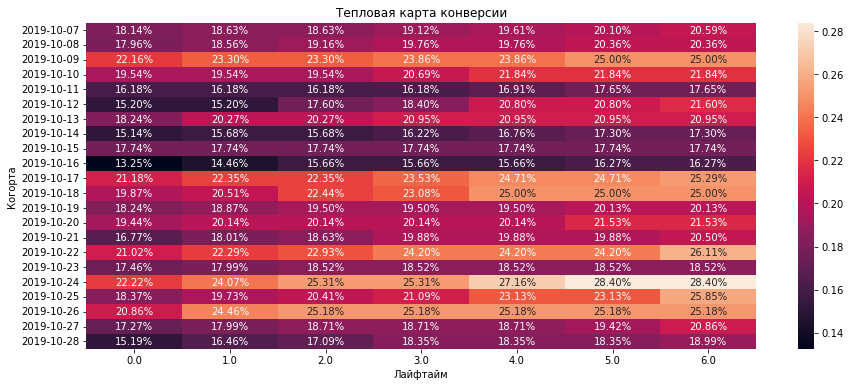

In [52]:
# построим тепловую карту конверсии пользователей 

plt.figure(figsize=(15, 6))
sns.heatmap(
    conversion_history.drop(columns=['cohort_size']),
    annot=True,
    fmt='.2%',
)
plt.title('Тепловая карта конверсии')
plt.xlabel('Лайфтайм')
plt.ylabel('Когорта')
plt.show()

**Вывод:** конверсия пользователей возрастает с 18% на 1 день до 21% на 7 день. При рассмотрении по когортам видно, что наибольшую конверсию на 7 день демонстрируют пользователи из когорты, привлеченной 24 октября 2019 г. (28,4%) и 22 октября 2019 г. (26,1%).

**4.6.3. Количество событий на пользователя.**

**4.6.3.1. Посмотрим среднее количество событий на одного пользователя в день:**

Для анализа среднего количество событий за день нам нужно создать новую таблицу.

In [53]:
# добавим в таблицу ds столбец с датой события
ds['dt'] = ds['event_time'].dt.date
ds.head()

,user_id,event_time,event_name,session_id,session_time,events_count,source,contacts,event_minute,dt
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,tips_show,1,9.0,9,other,False,2019-10-07 13:39:00,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31.052909,tips_show,1,9.0,9,other,False,2019-10-07 13:40:00,2019-10-07
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05.722489,tips_show,1,9.0,9,other,False,2019-10-07 13:41:00,2019-10-07
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20.735461,tips_show,1,9.0,9,other,False,2019-10-07 13:43:00,2019-10-07
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:45:30.917502,tips_show,1,9.0,9,other,False,2019-10-07 13:45:00,2019-10-07


Создадим таблицу с данными о количестве уникальных пользователей, количестве событий, совершенных за день и среднем количестве событий на одного пользователя в день:

In [54]:
# сгруппируем датасет events_by_day по столбцам 'user_id' и 'event_name' таблицы ds
# посчитаем количество уникальных пользователей за день и сумму событий за день
# переименуем столбцы и удалим индексы

events_by_day = (
                ds.groupby('dt')
                .agg(
                    {
                        'user_id': 'nunique', 
                        'event_name': 'count'
                                     
                    }
                )
                .rename(columns={'user_id': 'users',
                                'event_name': 'event_count',
                                })
                .reset_index()
)

# расcчитаем в новом столбце среднее количество событий на одного пользователя за день
events_by_day['events_by_user'] = round(events_by_day['event_count'] / events_by_day['users'],2)

display(events_by_day)

,dt,users,event_count,events_by_user
0,2019-10-07,204,2545,12.48
1,2019-10-08,204,2499,12.25
2,2019-10-09,227,2027,8.93
3,2019-10-10,233,2243,9.63
4,2019-10-11,206,2030,9.85
5,2019-10-12,178,1843,10.35
6,2019-10-13,226,2635,11.66
7,2019-10-14,298,3034,10.18
8,2019-10-15,303,2722,8.98
9,2019-10-16,278,2730,9.82


Визуализируем данные:
- Построим диаграмму по среднему количеству событий на одного пользователя по дням.

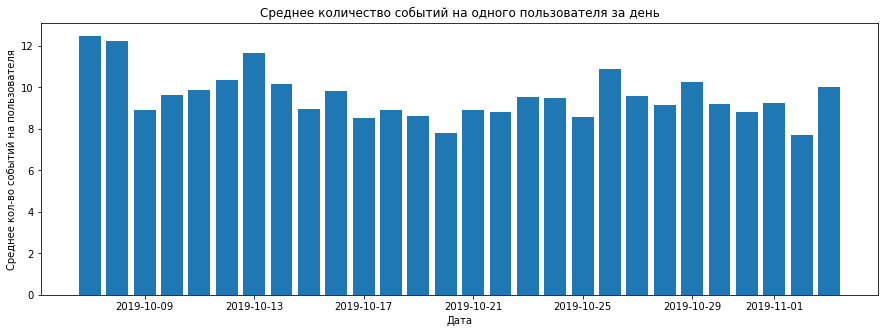

In [55]:
#построим гистограмму

plt.figure(figsize=(15, 5)) 
plt.bar(events_by_day['dt'], events_by_day['events_by_user'])
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во событий на пользователя')
plt.title('Среднее количество событий на одного пользователя за день')
plt.show()

**Вывод:** Среднее количество событий на одного пользователя за день остается примерно стабильным, на уровне 8-10 событий в день. Однако на графике видно, что в первые два дня наблюдения пользователи совершали больше событий (около 12 в день), а далее этот показатель снизился до 8-10  событий в день.

**4.6.3.2. Посмотрим среднее и медианное количество событий на одного пользователя за период наблюдения:**

In [56]:
#проверим cреднее количество событий на одного пользователя за все время
print(f'Среднее количество событий на одного пользователя:', round(
    ds.groupby('user_id')['event_name'].count().mean(), 2)
           ) 

Среднее количество событий на одного пользователя: 17.28


In [57]:
#проверим cреднее количество событий на одного пользователя за все время
print(f'Медианное количество событий на одного пользователя:', round(
    ds.groupby('user_id')['event_name'].count().median(), 2)
           ) 

Медианное количество событий на одного пользователя: 9.0


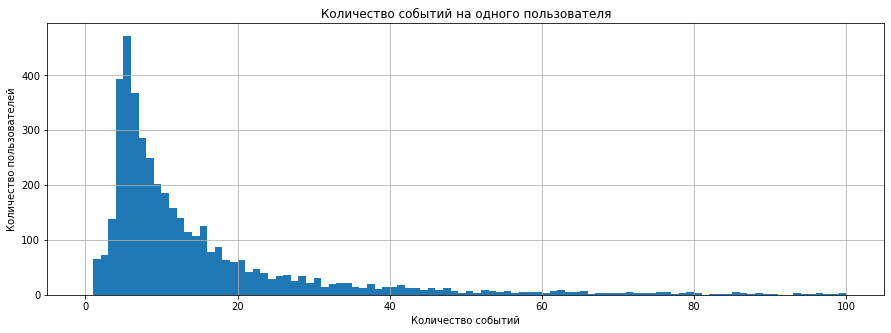

In [58]:
#построим гистограмму

plt.figure(figsize=(15, 5)) 
ds.groupby('user_id')['event_name'].count().hist(bins=100, range=(0,100)) 
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Количество событий на одного пользователя')
plt.show()

**Вывод:** За 28-дневный период наблюдения (за период с 7 октября по 3 ноября 2019 года) медианное количество событий на одного пользователя 9,0, среднее - 17,3 события. Это свидетельствует о том, что в логе есть отдельные пользователи, которые совершили аномально большое количество событий. На гистрограмме это явление представлено широким хвостом выбросов. Также на гистограмме видно, что большая часть пользователей совершили всего 1-2 события.

**4.6.3.3.Посмотрим среднее и медианное количество событий на одного пользователя за одну сессию:**

In [59]:
#проверим cреднее количество событий на одного пользователя за сессию
print(f'Среднее количество событий на одного пользователя за сессию:', round(
    sessions_per_user['events_count'].mean(), 2)
           ) 

Среднее количество событий на одного пользователя за сессию: 4.53


In [60]:
#проверим медианное количество событий на одного пользователя за сессию
print(f'Медианное количество событий на одного пользователя за сессию:', round(
    sessions_per_user['events_count'].median(), 2)
           ) 

Медианное количество событий на одного пользователя за сессию: 2.0


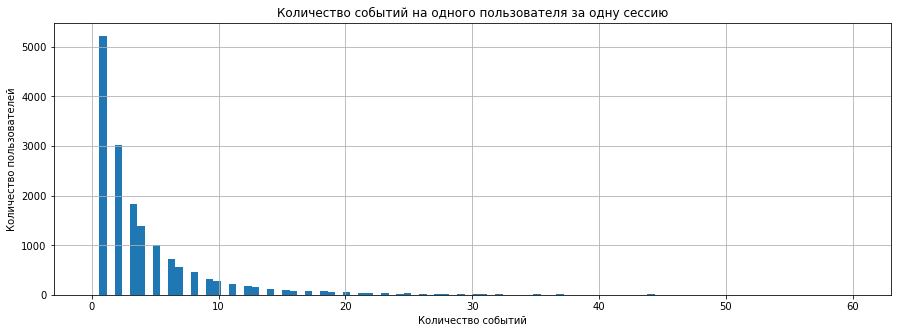

In [61]:
#построим гистограмму

plt.figure(figsize=(15, 5)) 
sessions_per_user['events_count'].hist(bins=100, range=(0,60))  
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Количество событий на одного пользователя за одну сессию')
plt.show()

**Вывод:** Среднее количество событий на одного пользователя за одну сессию - 4,53, а медианное - 2,0. Это также значит, что у нас есть отдельные пользователи, которые совершили аномально большое количество событий за сессию. На гистограмме также виден длинный хвост активных пользователей. Кроме того, большая доля пользователей совершили всего 1 событие за сессию. 

**4.6.4. Посмотрим среднее и медианное время сессии пользователей.**

In [62]:
#проверим cреднее время сессии пользователей
print('Средняя длина одной сессии пользователя: {} мин.'.format(
    round(sessions_per_user['session_time'].mean(), 2)) 
     ) 

Средняя длина одной сессии пользователя: 3.94 мин.


In [63]:
#проверим медианное время сессии пользователей
print('Медианная длина одной сессии пользователя: {} мин.'.format(
    round(sessions_per_user['session_time'].median(), 2)), 
     ) 

Медианная длина одной сессии пользователя: 1.0 мин.


In [64]:
#проверим максимальную длину сессии 
print('Максимальная длина сессии пользователя: {} мин.'.format(
    round(sessions_per_user['session_time'].max(), 2)), 
     ) 

Максимальная длина сессии пользователя: 118.0 мин.


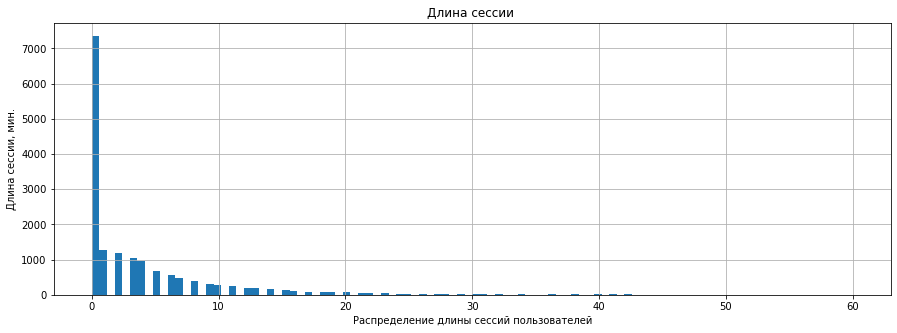

In [65]:
#построим гистограмму

plt.figure(figsize=(15, 5)) 
sessions_per_user['session_time'].hist(bins=100, range=(0,60)) 
plt.xlabel('Распределение длины сессий пользователей')
plt.ylabel('Длина сессии, мин.')
plt.title('Длина сессии ')
plt.show()

**Вывод:** Медианная длина сессии - 1 мин., средняя - почти 4 мин. На гистограмме видно, что большинство сессий длятся в пределах 1 минуты. Хвост выбросов из длинных сессий (до 118 мин.) увеличивает среднюю длину сессии по сравнению с медианной. 

### **Вывод** 

1. Мы располагаем данными о действиях **4293 пользователей** за период **с 7 октября по 3 ноября 2019 года**. 

2. **Моментом анализа** мы установили дату **3 ноября 2019 года**. В качестве **горизонта анализа** укажем **7 дней**. Это позволит нам посмотреть, как пользователи окупаются за неделю с момента начала использования приложения. Минимальная дата привлечения пользователей - 7 октября 2019 года, а максимальная дата - 28 октября 2019 года.

3. Среди событий, совершенных пользователями самые популярные `tips_show` — пользователь увидел рекомендованные объявления (40 тыс.), и `photos_show` — просмотр фотографий в объявлении (10 тыс.). В  приложении нет обязательного набора шагов, которые необходимо предпринять пользователю для целевого действия, поэтому мы не можем построит воронку событий до целевого действия `contacts_show` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления.

4. Пользователи распределены по источникам перехода в приложение более-менее равномерно. Больше всего пользователей пришло из источника **Яндекс (1934 чел.)**, а из источника **Google - 1129 чел.** Из остальных источников пришло суммарно 1230 чел.

5. **Удержание** пользователей, которые совершили целевое действие, выше, чем пользователей, которые не совершили целевое действие. Закономерно, удержание падает в течение недели: для **платящих пользователей (тех, кто соврешил целевое действие) - с на 2 день 20% до 12,5% на 7 день, для неплатящих - с 7,5% до 5%**. 

6. **Конверсия** пользователей возрастает **с 18% на 1 день до 21% на 7 день**. При рассмотрении по когортам видно, что наибольшую конверсию на 7 день демонстрируют пользователи из когорты, привлеченной 24 октября 2019 г. (28,4%) и 22 октября 2019 г. (26,1%).

7. **Среднее количество событий на одного пользователя за день** остается примерно стабильным, на уровне **8-10 событий в день**. 

8. За период наблюдения **медианное количество событий на одного пользователя 9,0, среднее - 17,3 события**. Это свидетельствует о том, что в логе есть отдельные пользователи, которые совершили аномально большое количество событий. Большая часть пользователей совершили всего 1-2 события.

9. **Среднее количество событий на одного пользователя за одну сессию - 4,53, а медианное - 2,0**. Это также значит, что у нас есть отдельные пользователи, которые совершили аномально большое количество событий за сессию. Кроме того, большая доля пользователей совершили всего 1 событие за сессию. 

10. **Медианная длина сессии - 1 мин., средняя - почти 4 мин.** Большинство сессий длятся в пределах 1 минуты. 

## 5. Выделение групп пользователей
[наверх](#Содержание)

**5.1. Сегментируем пользователей на 3-4 группы на основе различий их действий**

Сегментируем пользователей по тому, в какую часть дня они предпочитают использовать приложение.

Выделим **4 группы исходя из предпочтительного времени использования приложения (времени начала большинства сессий)**:
- утро (`morning`) c 5.00 до 12.00
- день (`day`) c 12.00 до 18.00
- вечер (`evening`) c 18.00 до 22.00
- ночь (`night`) c 22.00 до 5.00

Разделение по времени суток позволит нам проверить, существует ли какая-то зависимость между временем, когда пользователь предпочитает использовать приложение, и его активностью активностью в приложении, в том числе в просмотре контактов продавца. 

Если такая зависимость существует, мы можем воздействовать на целевые группы пользователей для увеличения продаж (например, настройкой пуш-уведомлений по времени суток, увеличением или сокращением количества рекомендованных объявлений). 

По результатам анализа предполагается, что наибольшую активность будут проявлять пользователи групп `day` и `evening`. С большей вероятностью клиенты используют приложение для продажи и покупки вещей после рабочего дня (когда они завершили основные задачи по работе и могут сосредоточиться на домашних делах) или в течение рабочего дня (если они прерываются от работы или работают по другому графику). Также можно предположить, что пользователи, которые используют приложение в основном ночью (группа `night`) с меньшей вероятностью будут открывать контакты продавца, поскольку это неудобное время для связи. В группе `morning` ожидается активность выше, чем в группе `night`, но ниже, чем в группах `day` и `evening`, поскольку, если пользователи придерживаются стандартного графика работы от с 8.00 до 17.00 до с 10.00 до 19.00 вероятнее всего они будут заняты приготовлениями к работе, дорогой (здесь мы можем ожидать увеличение активности пользователей) и задачами в начале рабочего дня.

Для начала определим час начала сессий: выделим час начала сессии в отдельный столбец таблицы **`sessions_per_user`** и округлим до круглого значения:

In [66]:
sessions_per_user['hour'] = sessions_per_user['session_start'].dt.round('1H')
sessions_per_user['hour'] = pd.DatetimeIndex(sessions_per_user['hour']).hour

Зададим функцию для определения времени суток для каждой сессии:

In [67]:
def time_of_day(hour):
    if (hour > 5) and (hour < 12):
        result = 'morning'
    elif (hour >= 12) and (hour < 18):
        result = 'day'
    elif (hour >= 18) and (hour < 22):
        result = 'evening'
    else:
        result = 'night'
        
    return result

Дополним таблицу **`sessions_per_user`** столбцом с временем суток сессии: 

In [68]:
sessions_per_user['day_part'] = sessions_per_user['hour'].apply(time_of_day)

Проверим результат:

In [69]:
sessions_per_user.head()

,user_id,session_id,events_count,session_start,session_end,session_time,source,contacts,hour,day_part
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,9,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.0,other,False,14,day
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2,2019-10-09 18:33:55.577963,2019-10-09 18:35:28.260975,1.0,other,False,19,evening
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2,2019-10-09 18:40:28.738785,2019-10-09 18:42:22.963948,1.0,other,False,19,evening
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,14,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14.0,other,False,20,evening
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5,8,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,12.0,other,False,11,morning


Итак, каждая сессия отнесена к определенному времени суток. 

Создадим новую таблицу с данными о самом частом времени суток для каждого пользователя:

In [70]:
# сгруппируем датасет sessions_per_user по столбцу 'user_id' 
# поссчитаем самое частое событие в столбце 'day_part' для каждого пользователя
# переименуем столбцы и удалим индексы

user_hour = (
                sessions_per_user.groupby(['user_id'])
                .agg(
                    {
                        
                        'day_part': [statistics.mode, 'count']
                                     
                    }
                )
                .rename(columns={
                                'mode': 'day_part',
                                'count': 'session_count'})
                .reset_index()
)

user_hour.columns = [tup[1] if tup[1] else tup[0] for tup in user_hour.columns]

Проверим результат:

In [71]:
user_hour.head(10)

,user_id,day_part,session_count
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,evening,5
1,00157779-810c-4498-9e05-a1e9e3cedf93,evening,17
2,00463033-5717-4bf1-91b4-09183923b9df,day,2
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,night,13
4,00551e79-152e-4441-9cf7-565d7eb04090,day,4
5,00554293-7e00-4122-b898-4e892c4a7c53,day,2
6,005fbea5-2678-406f-88a6-fbe9787e2268,morning,2
7,00653802-5ff1-4071-bc17-347fc4cef569,night,1
8,006a32d4-ee10-40dc-b237-11e0fde81cbc,evening,2
9,006f6ced-225b-4f9c-9f17-23404bc6835f,morning,2


Соберем таблицу с данными о количестве уникальных пользователей в каждой из групп:

In [72]:
#создадим сводную таблицу и поместим ее в переменную 'daypart_sum'
#в качестве индексов зададим 'day_part', в качестве значений количество уникальных 'user_id' и количество событий
#удалим индексы, чтобы столбцы 'session_count' 'user_id' стали столбцами новой таблицы

daypart_sum = user_hour.pivot_table(
    index='day_part',  
    values=['user_id', 'session_count'], aggfunc=({'user_id': 'nunique','session_count': 'sum'})
    ).reset_index().sort_values(by='user_id', ascending=False)

display(daypart_sum)

,day_part,session_count,user_id
0,day,7445,1799
1,evening,4117,1051
2,morning,2159,726
3,night,2645,717


Визуализируем данные по количеству пользователей в каждой группе:

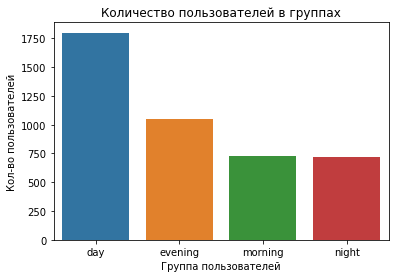

In [73]:
ax = sns.barplot(x='day_part', y='user_id', data=daypart_sum)
plt.xlabel('Группа пользователей')
plt.ylabel('Кол-во пользователей')
plt.title('Количество пользователей в группах')
plt.show()

**Вывод:** больше всего пользователей попали в группу day - 1799 пользователей используют приложение преимущественно днем. Второй по популярности является группа evening - 1051 человек используют приложение в основном вечером. Утром и ночью приложение используют, соответственно, 726 и 717 человек. 

Посмотрим, различается ли количество событий, которое совершают пользователи в разных группах. Для визуализации построим диаграмму "ящик с усами":

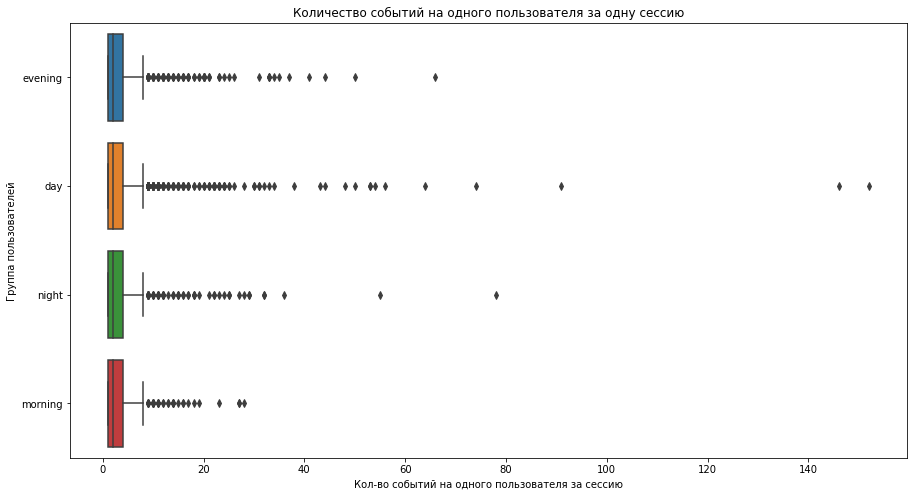

In [74]:
#построим диаграмму "ящик с усами"

plt.figure(figsize = (15,8))
ax = sns.boxplot(y='day_part', x='session_count', 
                 data = user_hour, orient="h")
plt.xlabel('Кол-во событий на одного пользователя за сессию')
plt.ylabel('Группа пользователей')
plt.title('Количество событий на одного пользователя за одну сессию')
plt.show()

Как видно, между группами пользователей нет различия по количеству событий на одну сессию. Большинство пользователей из каждой группы совершают от 1 до 3 событий за сессию.

Из-за выбросов плохо видно квантили и медиану, ограничим зону просмотра:

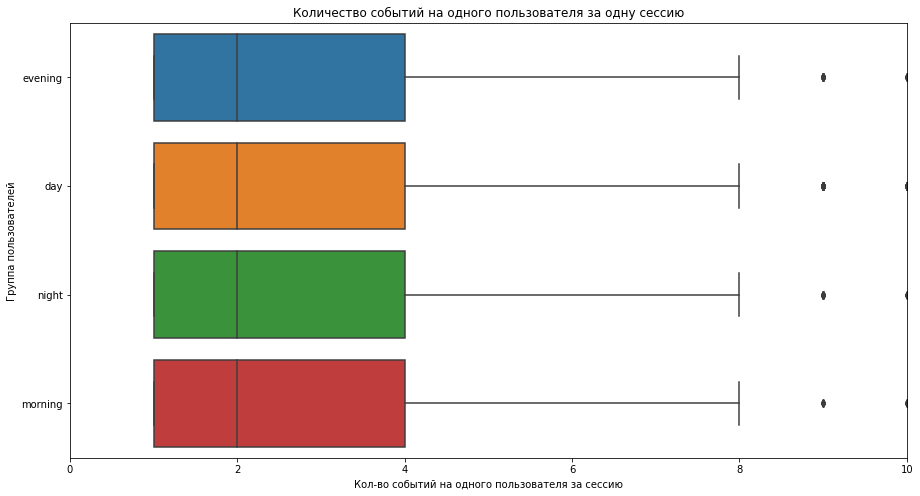

In [75]:
#построим диаграмму "ящик с усами"

plt.figure(figsize = (15,8))
ax = sns.boxplot(y='day_part', x='session_count', 
                 data = user_hour, orient="h")
plt.xlim([0, 10])
plt.xlabel('Кол-во событий на одного пользователя за сессию')
plt.ylabel('Группа пользователей')
plt.title('Количество событий на одного пользователя за одну сессию')
plt.show()

Теперь отчетливо видно, что для всех групп показатели количества событий, которое совершают пользователи, идентично: медиана - 2 события, 75% квантиль - 4 события (75% пользователей совершили не более 4 событий).

Добавим данные о группе пользователей (преимущественному времени использования приложения) в профили пользователей:

In [76]:
# присоединим к таблице profiles таблицу user_hour

profiles = profiles.merge(
    user_hour, 
    on='user_id', 
    how='left'
)

Проверим результат:

In [77]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        4293 non-null   object        
 1   first_ts       4293 non-null   datetime64[ns]
 2   source         4293 non-null   object        
 3   dt             4293 non-null   object        
 4   month          4293 non-null   datetime64[ns]
 5   day_part       4293 non-null   object        
 6   session_count  4293 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 268.3+ KB


Мы добавили в профили пользователей группу пользователя и общее количество событий, которое пользователь совершил.

**5.2. Для каждой группы пользователей расчитаем Retention rate**

In [78]:
# смотрим удержание с разбивкой по группе пользователей
dimensions = ['day_part']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions_per_user, observation_date, horizon_days, dimensions=dimensions
)

Визуализируем данные. Построим тепловые карты для каждой из групп пользователей:

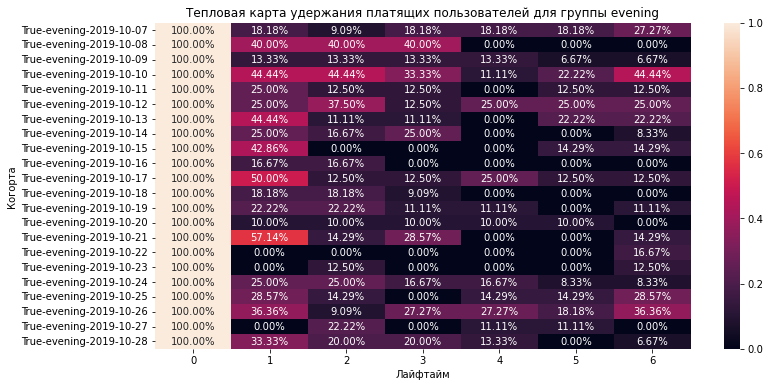

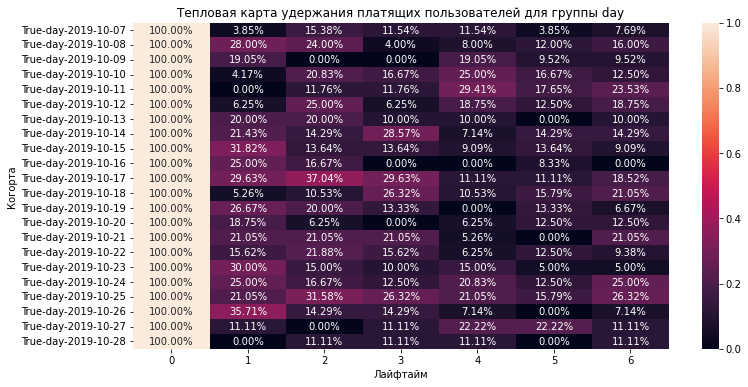

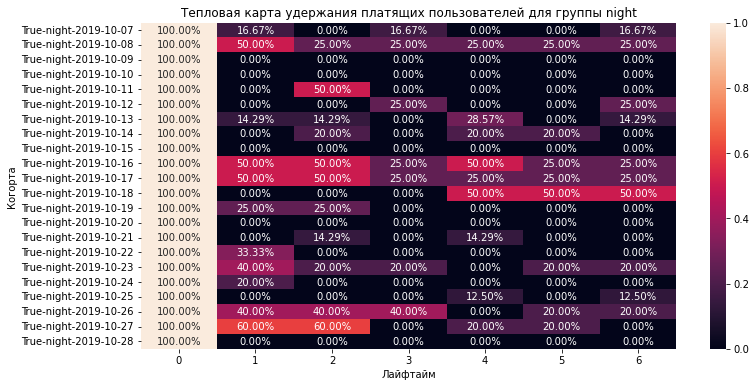

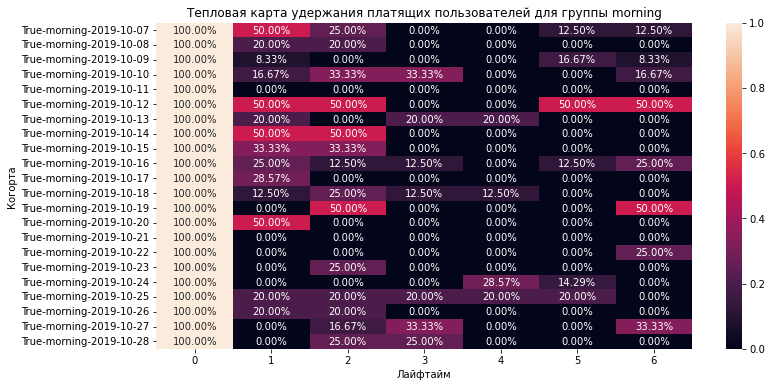

In [79]:
# построим тепловые карты удержания для пользователей, которые совершили целевое действие 

for item in profiles['day_part'].unique():
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(
    retention_history.query('(day_part == @item) & (contacts == True)').drop(columns=['cohort_size']),
    annot=True,
    fmt='.2%',
    )
    plt.title('Тепловая карта удержания платящих пользователей для группы {}'.format(item))
    plt.xlabel('Лайфтайм')
    plt.ylabel('Когорта')
    plt.show()

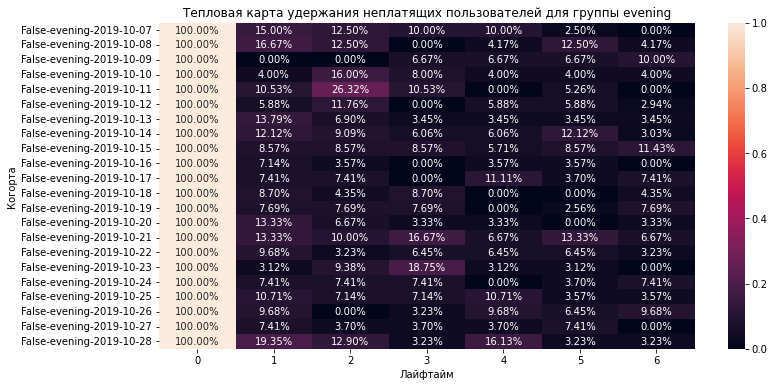

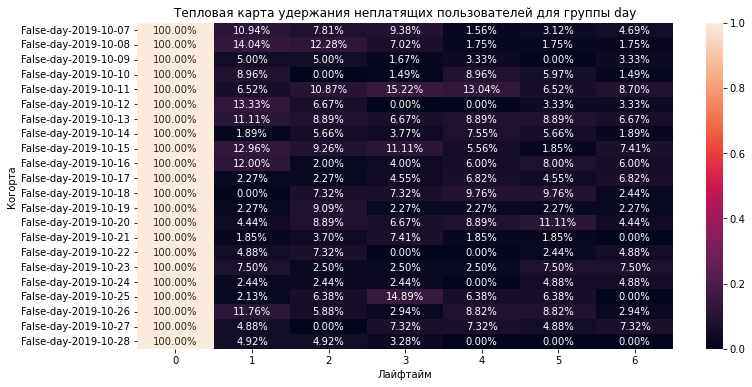

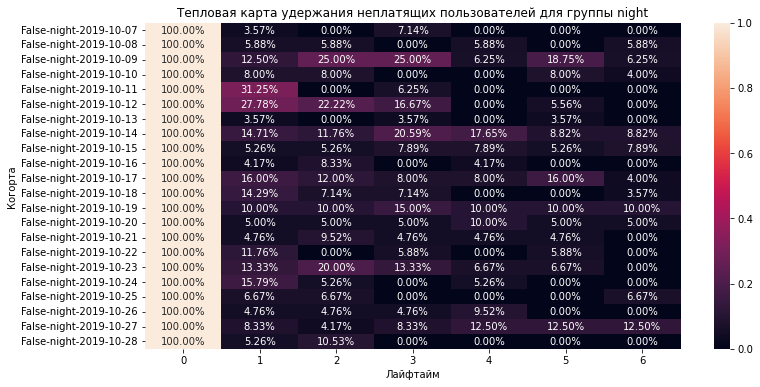

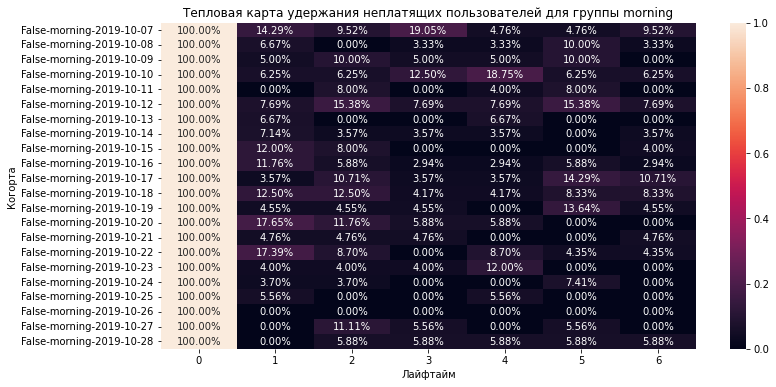

In [80]:
# построим тепловые карты удержания для пользователей, которые не совершили целевое действие 

for item in profiles['day_part'].unique():
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(
    retention_history.query('(day_part == @item) & (contacts == False)').drop(columns=['cohort_size']),
    annot=True,
    fmt='.2%',
    )
    plt.title('Тепловая карта удержания неплатящих пользователей для группы {}'.format(item))
    plt.xlabel('Лайфтайм')
    plt.ylabel('Когорта')
    plt.show()

Визуализируем удержание пользователей по группам на графиках:

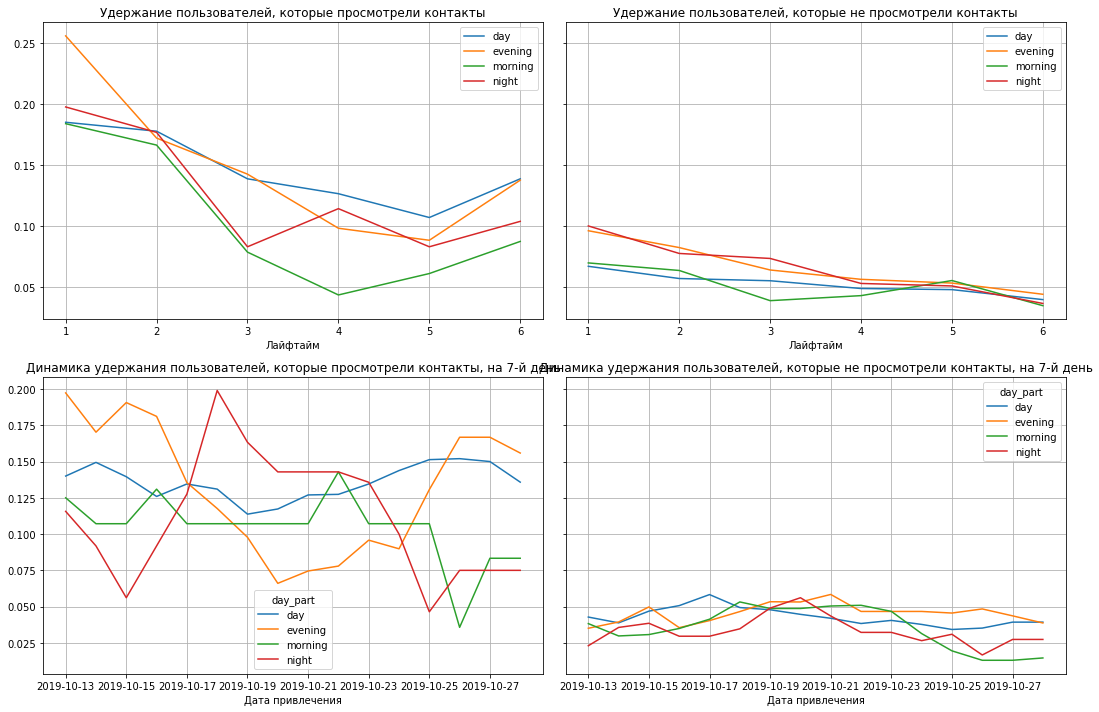

In [81]:
# визуализируем данные с помощью функции plot_retention

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Как видно из графиков, в целом удержание пользователей, которые совершили целевое действие, выше, чем пользователей, которые не совершили целевое действие. Наиболее высокое удержание демонстрирует группа  пользователей `day`, которые пользуются приложением днем - для нее retention rate снижается с 18% на 2 день до 14% на 7 день. Ниже всего показатель удержания для группы `morning` - для нее retention rate снижается с 18% на 2 день до 8% на 7 день. 

Удержание на 7-й день нестабильно для разных когорт (это может быть связано с небольшим количеством пользователей в каждой когорте), однако можно заметить, что группа `day` демонстрирует относительно высокое удержание для каждой когорты (12-15%).

**5.3. Для каждой группы пользователей расчитаем конверсию**

Применим функции, которые задали ранее и посмотрим конверсию для каждой группы пользователей:

In [82]:
# получим данные о конверсии по группам с помощью функции get_conversion
dimensions = ['day_part']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, ds, observation_date, horizon_days, dimensions=dimensions
)

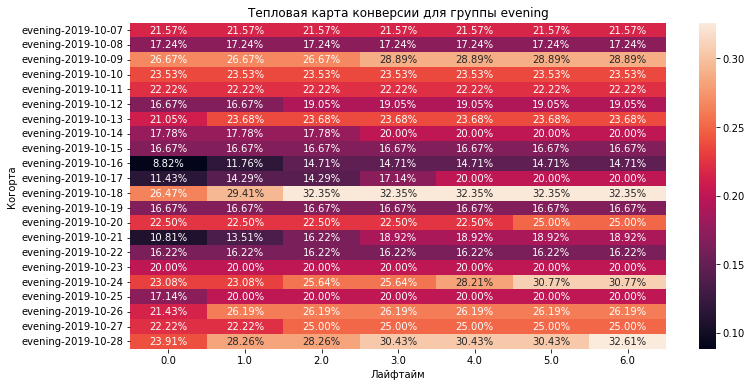

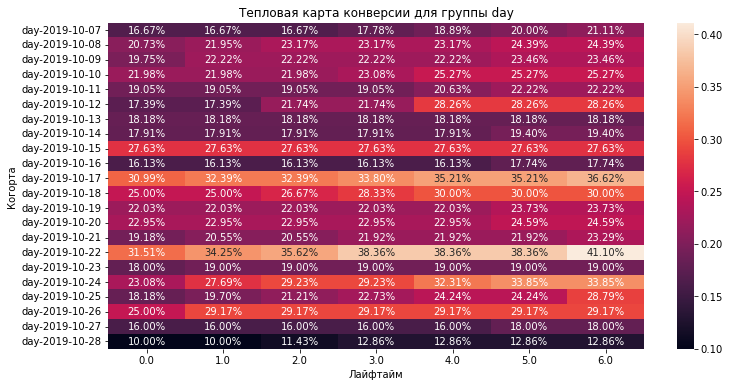

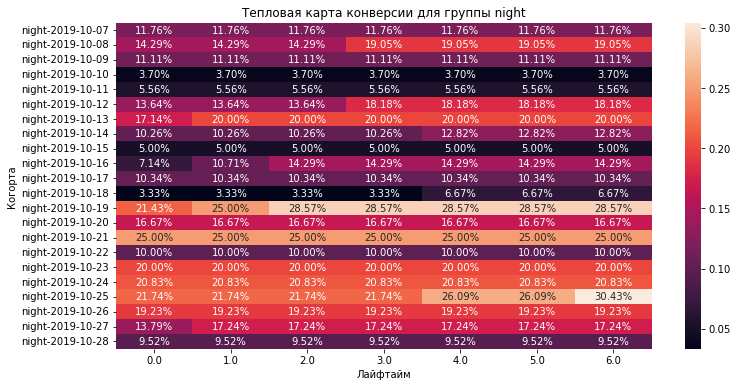

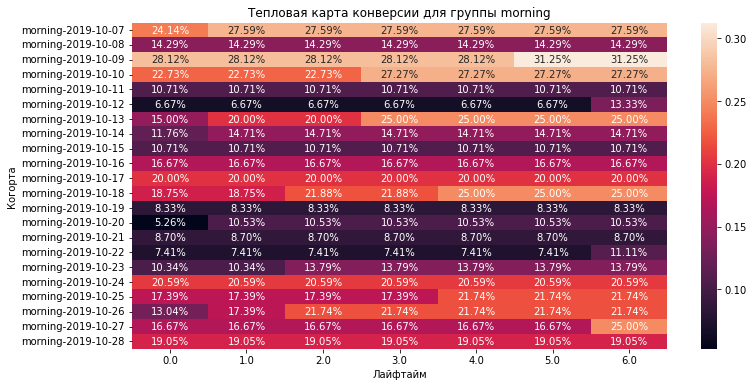

In [83]:
# построим тепловые карты конверсии по группам пользователей

for item in profiles['day_part'].unique():

    plt.figure(figsize=(12, 6))
    sns.heatmap(
    conversion_history.query('day_part == @item').drop(columns=['cohort_size']),
    annot=True,
    fmt='.2%',
    )
    plt.title('Тепловая карта конверсии для группы {}'.format(item))
    plt.xlabel('Лайфтайм')
    plt.ylabel('Когорта')
    plt.show()

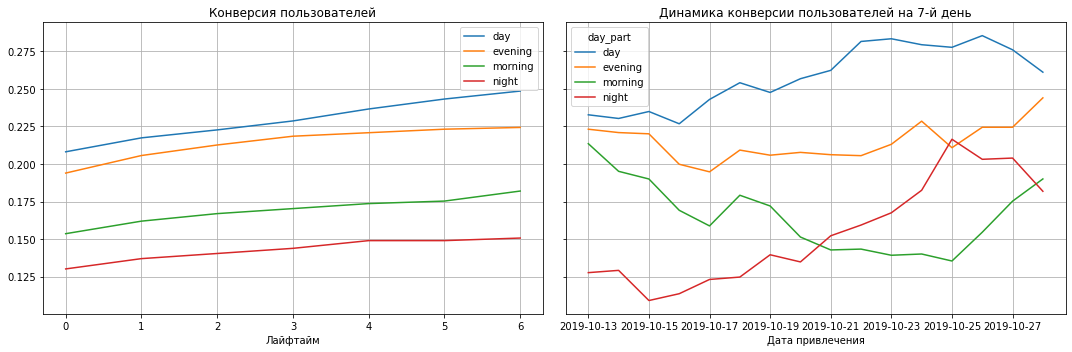

In [84]:
# визуализируем данные с помощью функции plot_conversion

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** наибольшая конверсия в группе `day` - она возрастает с 21% на 1 день до 25% на 7 день. Второй по конверсии является группа `evening` - в ней конверсия возрастает с 19% на 1 день до 22,5% на 7 день.
Наименьшая конверсия в группе `night` - она возрастает с 12% на 1 день до 15% на 7 день. Пользователи, которые используют приложение преимущественно ночью, реже смотрят карточку контактов. В группе `morning` конверсия возрастает с 15% на 1 день до 18% на 7 день.

Конверсия по когортам на 7-й день для группы  `day` стабильно выше, чем для всех остальных групп (22-27%). Можно также наблюдать, что конверсия группы `night` постепенно возрастает в течение месяца для новых когорт (с 12% до 20%), а для группы `morning`, наоборот, конверсия когорт начинает снижаться (с 20% до 14%), но для когорты 27 октября 2019 г. она вновь возрастает.

### **Вывод** 

1) Пользователи были разделены на 4 группы исходя из предпочтительного времени использования приложения (времени начала большинства сессий):
- утро (`morning`) c 5.00 до 12.00 - 726 пользователей
- день (`day`) c 12.00 до 18.00 - 1799 пользователей
- вечер (`evening`) c 18.00 до 22.00 - 1051 пользователей
- ночь (`night`) c 22.00 до 5.00 - 717 пользователей

2) Удержание пользователей, которые совершили целевое действие, выше, чем пользователей, которые не совершили целевое действие. Для пользователей, которые совершили целевое действие, наиболее высокое удержание демонстрирует группа пользователей `day`, которые пользуются приложением днем - для нее retention rate снижается с 18% на 2 день до 14% на 7 день. Ниже всего показатель удержания для группы `morning` - для нее retention rate снижается с 18% на 2 день до 8% на 7 день.

3) Удержание на 7-й день нестабильно для разных когорт (это может быть связано с небольшим количеством пользователей в каждой когорте), однако можно заметить, что группа `day` демонстрирует относительно высокое удержание для каждой когорты (12-15%).

4) Наибольшая конверсия в группе `day` - она возрастает с 21% на 1 день до 25% на 7 день. Второй по конверсии является группа `evening` - в ней конверсия возрастает с 19% на 1 день до 22,5% на 7 день. Наименьшая конверсия в группе `night` - она возрастает с 12% на 1 день до 15% на 7 день. В группе `morning` конверсия возрастает с 15% на 1 день до 18% на 7 день. Пользователи, которые используют приложение преимущественно ночью, реже всего смотрят карточку контактов. 

5) Конверсия по когортам на 7-й день для группы  `day` стабильно выше, чем для всех остальных групп (22-27%). Можно также наблюдать, что конверсия группы `night` постепенно возрастает в течение месяца для новых когорт (с 12% до 20%), а для группы `morning`, наоборот, конверсия когорт начинает снижаться (с 20% до 14%), но для когорты 27 октября 2019 г. она вновь возрастает.

**По итогам анализа поведения пользователей по группам**

Как мы и предполагали в начале, наибольшую активность проявляют пользователи групп `day` и `evening`:

- **Целевая группа** - `day` - для нее характерны самые высокие показатели удержания и конверсии. Целесообразно сосредоточиться на этой группе для увеличения продаж через приложения.
- **Смежные группа** - `evening` - она на втором месте по показателям удержания и конверсии.

## 6. Проверка статистических гипотез
[наверх](#Содержание)

Проверим две статистические гипотезы о различиях в совершении целевого действия между группами пользователей.

**6.1. Гипотеза 1: Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверим гипотезу о том, что две эти группы демонстрируют разную конверсию в просмотры контактов.**

**Гипотезы:**
- **Нулевая гипотеза**: статистически значимых различий между долями группы пользователей, которые установили приложение по ссылке из Yandex, и группы пользователями, которые установили приложение по ссылке из Google, нет. 
- **Альтернативная гипотеза**: между долями группы пользователей, которые установили приложение по ссылке из Yandex, и группы пользователями, которые установили приложение по ссылке из Google, есть значимая разница.

**Назначим и обоснуем уровень значимости.** В качестве уровня значимости используем 0.01. Уровень точности в 1% позволит нам достоверно определить, есть ли различия между группами по источнику перехода. 

Для начала посчитаем число и долю пользователей, совершивших целевое событие в каждой из групп. Для этого объединим таблицы с данными об источнике перехода в приложение и факте просмотра карточки контактов:

In [85]:
# присоединим к таблице sources столбец 'contacts' из таблицы sessions_per_user
# выведем на экран первые 5 строк таблицы и информацию о таблице

visitors = sources.merge(
    sessions_per_user[['user_id', 'contacts']], 
    on=['user_id'], 
    how='left'
).drop_duplicates().reset_index(drop=True)
display(visitors.head())
display(visitors.info())

,user_id,source,contacts
0,020292ab-89bc-4156-9acf-68bc2783f894,other,False
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,False
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,True
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other,False
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   4293 non-null   object
 1   source    4293 non-null   object
 2   contacts  4293 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 71.4+ KB


None

У нас есть таблица с данными об источнике перехода и факте совершения целевого действия для каждого пользователя. Создадим сводную таблицу с данными по количеству пользователей, которые посмотрели карточку контактов, и общем количестве пользователей для каждого источника перехода

In [86]:
#создадим сводную таблицу и поместим ее в переменную 'visitors_sum'
#в качестве индексов зададим 'source', в качестве столбцов 'contacts' (факт просмотра контактов)
#в новом столбце посчитаем общее количество пользователей в группе

visitors_sum = visitors.pivot_table(
    index='source', columns = 'contacts', 
    values='user_id', aggfunc='count'
    ).reset_index().rename(columns={False: 'contacts_false',
                                True: 'contacts_true',
                                })
visitors_sum['total'] = visitors_sum['contacts_false'] + visitors_sum['contacts_true']

display(visitors_sum)

contacts,source,contacts_false,contacts_true,total
0,google,854,275,1129
1,other,1002,228,1230
2,yandex,1456,478,1934


Данные по группам посчитаны. Для расчета выведем из таблицы списки:

In [87]:
#создадим списки с группами пользователей и количеством уникальных пользователей, совершивших каждое событие

types_of_users = []
contacts_users = []
total_users = []

for i in range(0,3):
    types_of_users.append(visitors_sum.loc[i, 'source'])
    contacts_users.append(visitors_sum.loc[i, 'contacts_true'])
    total_users.append(visitors_sum.loc[i, 'total'])

display(types_of_users)
display(contacts_users)
display(total_users)    

['google', 'other', 'yandex']

[275, 228, 478]

[1129, 1230, 1934]

Создадим функцию для статистического сравнения двух групп пользователей (z-тест):

In [88]:
#создадим функцию для статического сравнения между группами долей пользователей по каждому событию

def comp_group(A, B, alpha):
    
    print("Отличие между группами {} и {}:".format(A, B))
    
    A_index = types_of_users.index(A)
    B_index = types_of_users.index(B)
    users_by_event = np.array([contacts_users[A_index], contacts_users[B_index]]) 
    all_users = np.array([total_users[A_index], total_users[B_index]])

    p1 = users_by_event[0]/all_users[0]
# пропорция успехов во второй группе: 
    p2 = users_by_event[1]/all_users[1]
# пропорция успехов в комбинированном датасете:
    p_combined = (users_by_event[0] + users_by_event[1]) / (all_users[0] + all_users[1])
#разница пропорций в датасетах 
    difference = p1 - p2
#считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_users[0] + 1/all_users[1]))
#задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1) 
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print("p-value: {0:.3f}".format(p_value))
         
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
    print("")
   

Проверим, будет ли отличие между группами статистически достоверным (проведем z-тест):

In [89]:
#сравним события групп "google" и "yandex" при помощи функции

alpha = 0.01 # критический уровень статистической значимости

comp_group("google", "yandex", alpha)

Отличие между группами google и yandex:
p-value: 0.824
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**Вывод** 

По итогам проведения z-теста не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Статистически значимых различий в совершении целевого действия между долями группы пользователей, которые установили приложение по ссылке из Yandex, и группы пользователями, которые установили приложение по ссылке из Google, нет.

**6.2. Гипотеза 2: В приложении есть функция добавления объевления в избранное. Проверим гипотезу о том, что у пользователей, которые добавляют объявление в избранное, выше конверсия в целевое действие (просмотр контактов), чем у остальных пользователей.**

**Гипотезы:**
- **Нулевая гипотеза**: статистически значимых различий между долями группы пользователей, которые добавляют объевление в избранное, и группы пользователями, которые не добавляют объявление в избранное, нет. 
- **Альтернативная гипотеза**: между долями группы пользователей, которые добавляют объевление в избранное, и группы пользователями, которые не добавляют объевление в избранное, есть значимая разница.

**Назначим и обоснуем уровень значимости.** В качестве уровня значимости используем 0.01. Уровень точности в 1% позволит нам достоверно определить, есть ли различия между группами. 

Посчитаем число и долю пользователей, совершивших целевое событие в каждой из групп. 

Для начала добавим в таблицу **`ds`** столбец с признаком того, что пользователь добавлял объявление в избранное:

In [90]:
# создадим столбец 'favorites' 
# впишем туда результат проверки наличия 'user_id' с списке пользователей, которые совершили целевое действие

ds['favorites'] = ds['user_id'].isin(ds[ds['event_name'] == 'favorites_add']['user_id'].unique())

In [91]:
# создадим отдельную таблицу с пользователями, которые совершили целевое действие
favorites = ds[['user_id', 'favorites']]
favorites = favorites.drop_duplicates().reset_index(drop=True)

Объединим эту таблицу с таблицей с данными об источнике перехода в приложение и факте просмотра карточки контактов:

In [92]:
# присоединим к таблице visitors столбец 'favorites' из таблицы favorites
# выведем на экран первые 5 строк таблицы и информацию о таблице

visitors = visitors.merge(
    favorites[['user_id', 'favorites']], 
    on=['user_id'], 
    how='left'
).drop_duplicates().reset_index(drop=True)
display(visitors.head())
display(visitors.info())

,user_id,source,contacts,favorites
0,020292ab-89bc-4156-9acf-68bc2783f894,other,False,False
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,False,False
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex,True,False
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other,False,False
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    4293 non-null   object
 1   source     4293 non-null   object
 2   contacts   4293 non-null   bool  
 3   favorites  4293 non-null   bool  
dtypes: bool(2), object(2)
memory usage: 75.6+ KB


None

У нас есть таблица с данными об источнике перехода, факте добавления пользователем карточки в избранное и факте совершения целевого действия для каждого пользователя (просмотр контактов). 

Создадим сводную таблицу с данными по количеству пользователей, которые посмотрели карточку контактов, и общем количестве пользователей для каждой группы пользователей (которые добавили объявление в избранное и не добавили обявление в избранное):

In [93]:
#создадим сводную таблицу и поместим ее в переменную 'favorites_sum'
#в качестве индексов зададим 'favorites', в качестве столбцов 'contacts' (факт просмотра контактов)
#в новом столбце посчитаем общее количество пользователей в группе

favorites_sum = visitors.pivot_table(
    index='favorites', columns = 'contacts', 
    values='user_id', aggfunc='count'
    ).reset_index().rename(columns={False: 'contacts_false',
                                True: 'contacts_true',
                                })
favorites_sum['total'] = favorites_sum['contacts_false'] + favorites_sum['contacts_true']

display(favorites_sum)

contacts,favorites,contacts_false,contacts_true,total
0,False,3097,845,3942
1,True,215,136,351


Данные по группам посчитаны. Для расчета выведем из таблицы списки:

In [94]:
#создадим списки с группами пользователей и количеством уникальных пользователей, совершивших каждое событие

types_of_users = []
contacts_users = []
total_users = []

for i in range(0,2):
    types_of_users.append(favorites_sum.loc[i, 'favorites'])
    contacts_users.append(favorites_sum.loc[i, 'contacts_true'])
    total_users.append(favorites_sum.loc[i, 'total'])

display(types_of_users)
display(contacts_users)
display(total_users)    

[False, True]

[845, 136]

[3942, 351]

Проверим, будет ли отличие между группами статистически достоверным (проведем z-тест):

In [95]:
#сравним события групп False (не добавили в избранное) и True (добавили в избранное) при помощи функции

alpha = 0.01 # критический уровень статистической значимости
comp_group(False, True, alpha)

Отличие между группами False и True:
p-value: 0.000
Отвергаем нулевую гипотезу: между долями есть значимая разница



**Вывод** 

По итогам проведения z-теста можно отвергнуть нулевую гипотезу и утверждать, что между долями группы пользователей, которые добавляют объевление в избранное, и группы пользователями, которые не добавляют объевление в избранное, есть значимая разница.

## 7. Общий вывод
[наверх](#Содержание)

Мы провели исследование поведения пользователей приложения «Ненужные вещи», которое используется для продажи ненужных вещей. 

### **Цели и задачи исследования**: 

**1. Общий анализ поведения пользователей:**

   1. retention rate,
   2. время, проведённое в приложении, 
   3. частота действий, 
   4. конверсия в целевое действие — просмотр контактов.


**2. Выделение групп пользователей на основе их поведения в приложении. Определение целевой и смежных групп для увеличения продаж.**

Мы выделили группы пользователей и проанализировали следующие показатели для каждой из групп:

   1. retention rate,
   2. конверсия в целевое действие — просмотр контактов.


**3. Проверка статистических гипотез поведения пользователей:**

Мы проверили следующие статистические гипотезы: 

   3.1. Конверсия пользователей, которые загрузили приложение через Яндекс, отличается от конверсии пользователей, которые загрузили приложение через Google. 

   3.2. В приложении есть функция добавления объявлений в избранное. Проверим гипотезу о том, что у пользователей, которые добавляют объявление в избранное, выше конверсия в целевое действие (просмотр контактов), чем у остальных пользователей.

**Работа прошла в несколько этапов:**

1. Загрузили данных и подготовили их к анализу.
2. Создали нужные для анализа функции.
3. Проанализировали данные.
4. Сегментировали пользователей на группы и посмотрели для каждой из них удержание и конверсию.
5. Проверили статистические гипотезы.

### **По итогам анализа данных мы можем сделать следующие выводы о поведении пользователей:**

1. Были проанализированы данные о действиях **4293 пользователей** за период **с 7 октября по 3 ноября 2019 года**. 

2. **Момент анализа** - **3 ноября 2019 года**. **Горизонт анализа** - **7 дней**. Такие показатели позволили узнать, как пользователи окупаются за неделю с момента начала использования приложения. Минимальная дата привлечения пользователей - 7 октября 2019 года, а максимальная дата - 28 октября 2019 года.

3. Среди событий, совершенных пользователями, самые популярные `tips_show` — пользователь увидел рекомендованные объявления (40 тыс.), и `photos_show` — просмотр фотографий в объявлении (10 тыс.). В  приложении нет обязательного набора шагов, которые необходимо предпринять пользователю для целевого действия, поэтому мы не можем построит воронку событий до целевого действия `contacts_show` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления.

4. Пользователи распределены по источникам перехода в приложение более-менее равномерно. Больше всего пользователей пришло из источника **Яндекс (1934 чел.)**, а из источника **Google - 1129 чел.** Из остальных источников пришло суммарно 1230 чел.

5. **Удержание** пользователей, которые совершили целевое действие, выше, чем пользователей, которые не совершили целевое действие. Закономерно, удержание падает в течение недели: для **платящих пользователей (тех, кто соврешил целевое действие) - с на 2 день 20% до 12,5% на 7 день, для неплатящих - с 7,5% до 5%**. 

6. **Конверсия** пользователей возрастает **с 18% на 1 день до 21% на 7 день**. При рассмотрении по когортам видно, что наибольшую конверсию на 7 день демонстрируют пользователи из когорты, привлеченной 24 октября 2019 г. (28,4%) и 22 октября 2019 г. (26,1%).

7. **Среднее количество событий на одного пользователя за день** остается примерно стабильным, на уровне **8-10 событий в день**. 

8. За период наблюдения **медианное количество событий на одного пользователя 9,0, среднее - 17,3 события**. Это свидетельствует о том, что в логе есть отдельные пользователи, которые совершили аномально большое количество событий. Большая часть пользователей совершили всего 1-2 события.

9. **Среднее количество событий на одного пользователя за одну сессию - 4,53, а медианное - 2,0**. Это также значит, что у нас есть отдельные пользователи, которые совершили аномально большое количество событий за сессию. Кроме того, большая доля пользователей совершили всего 1 событие за сессию. 

10. **Медианная длина сессии - 1 мин., средняя - почти 4 мин.** Большинство сессий длятся в пределах 1 минуты. 

### **По итогам выделения групп пользователей на основе их поведения в приложении и анализа их поведения можно сделать следующие выводы:**

1) Пользователи были разделены на **4 группы исходя из предпочтительного времени использования приложения (времени начала большинства сессий)**:
- утро (`morning`) c 5.00 до 12.00 - 726 пользователей
- день (`day`) c 12.00 до 18.00 - 1799 пользователей
- вечер (`evening`) c 18.00 до 22.00 - 1051 пользователей
- ночь (`night`) c 22.00 до 5.00 - 717 пользователей

2) Удержание пользователей, которые совершили целевое действие, выше, чем пользователей, которые не совершили целевое действие. Для пользователей, которые совершили целевое действие, **наиболее высокое удержание демонстрирует группа пользователей `day`**, которые пользуются приложением днем - для нее **retention rate снижается с 18% на 2 день до 14% на 7 день**. **Ниже всего показатель удержания для группы `morning` - для нее retention rate снижается с 18% на 2 день до 8% на 7 день**.

3) **Удержание на 7-й день** нестабильно для разных когорт (это может быть связано с небольшим количеством пользователей в каждой когорте), однако можно заметить, что **группа `day` демонстрирует относительно высокое удержание для каждой когорты (12-15%)**.

4) **Наибольшая конверсия в группе `day` - она возрастает с 21% на 1 день до 25% на 7 день**. Второй по конверсии является группа `evening` - в ней конверсия возрастает с 19% на 1 день до 22,5% на 7 день. Наименьшая конверсия в группе `night` - она возрастает с 12% на 1 день до 15% на 7 день. В группе `morning` конверсия возрастает с 15% на 1 день до 18% на 7 день. Пользователи, которые используют приложение преимущественно ночью, реже всего смотрят карточку контактов. 

5) **Конверсия по когортам на 7-й день для группы `day` стабильно выше, чем для всех остальных групп (22-27%)**. Можно также наблюдать, что конверсия группы `night` постепенно возрастает в течение месяца для новых когорт (с 12% до 20%), а для группы `morning`, наоборот, конверсия когорт начинает снижаться (с 20% до 14%), но для когорты 27 октября 2019 г. она вновь возрастает.

**Определение целевой и смежных групп для увеличения продаж:**

- **Целевая группа** - `day` - для нее характерны самые высокие показатели удержания и конверсии. Целесообразно сосредоточиться на этой группе для увеличения продаж через приложения.
- **Смежные группа** - `evening` - она на втором месте по показателям удержания и конверсии.

Также мы проверили две статистические гипотезы на основе выборок данных по источнику перехода в приложение и добавлению объявления в избранное.

### **По итогам проверки гипотез можно сделать следующие выводы:**

1. Статистически значимых различий в совершении целевого действия между долями группы пользователей, которые установили приложение по ссылке из Yandex, и группы пользователями, которые установили приложение по ссылке из Google, нет.

2. По итогам проведения z-теста можно отвергнуть нулевую гипотезу и утверждать, что между долями группы пользователей, которые добавляют объявление в избранное, и группы пользователями, которые не добавляют объявление в избранное, есть значимая разница.

### **Рекомендации по увеличению продаж через приложение "Ненужные вещи":**

- Сосредоточиться на целевой группе пользователей, которые преимущественно пользовуются приложением днем (с 12.00 до 18.00), а также вечером (с 18.00 до 22.00);


- Пользователи, которые добавляют объявления в избранное, чаще совершают целевое действие (просмотр контактов). Можно подумать о том, чтобы упростить функционал добавления в избранное. Тогда пользователь с большей вероятностью не потеряет нужное объявление и посмотрит контакт;


- Общая конверсия пользователей возрастает всего с 18 до 22% в течение недели. Это свидетельствует о том, что если пользователь не просмотрел контакты в первый день, то вероятность того, что он сделает это в течение недели не очень велика. Нужно либо облегчить функционал просмотра контактов (чтобы пользователь посмотрел из сразу же), либо добавить функционал напоминания о просмотренных и избранных объявлениях, чтобы пользователь вернулся в приложение.